In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('trading_fraud_risk_classification.csv')

In [3]:
df

,Login_ID,Created_At,Account_Status,Deposit_Amount,Deposit_Timestamp,Withdrawal_Amount,Withdrawal_Timestamp,Trade_Count,Trade_Volume,Trade_Profit_Loss,...,Session_Start_Time,Session_End_Time,Session_Duration,IP_Address,Device_Type,Login_Geolocation,API_Call_Count,Time_to_First_Trade,Suspicious_Flag,Risk_Level
0,daf61a26-146d-4f31-bc37-7a4c4a15544d,2022-05-17 17:10:20,Active,-1105,2025-02-05 17:51:41,1160,2025-02-09 10:24:10,8,433,133.331954,...,2025-01-03 12:36:40,2025-01-10 06:21:17,53072,216.114.142.92,Tablet,Venezuela,165,2025-01-31 12:01:35,Not Suspicious,Medium Risk
1,25074181-8d1f-4540-b4ef-f5453e652603,2024-08-09 05:25:45,Inactive,1170,2025-01-14 13:56:04,2634,2025-01-17 21:02:36,5,975,237.652329,...,2024-12-29 13:24:08,2025-02-02 13:04:23,34973,170.249.183.86,Desktop,Gambia,316,2025-01-16 22:11:16,Not Suspicious,Medium Risk
2,5d59cd2a-4eea-44e7-8ab5-4bde20a04502,2025-04-25 00:31:29,Inactive,10429,2025-02-01 17:11:48,1699,2025-01-24 08:23:59,1,693,134.335138,...,2025-01-14 19:27:43,2025-01-09 07:19:50,0,173.79.33.157,Mobile,Switzerland,132,2025-01-05 16:31:32,Not Suspicious,Medium Risk
3,7d7ddbed-d284-476c-ab88-f83dd97dc9cd,2022-09-02 11:12:48,Active,4794,2025-01-10 10:46:19,2283,2025-02-05 22:49:43,1,990,203.263259,...,2024-12-27 08:47:48,2025-01-19 01:57:27,39300,35.148.124.195,Mobile,Australia,330,2025-01-06 15:27:07,Not Suspicious,Medium Risk
4,784c2f29-9804-42a2-b07a-a066735435ea,2023-05-26 09:52:28,Inactive,-62,2025-01-21 02:04:17,2637,2025-01-02 20:08:37,1,398,198.424536,...,2025-01-11 20:56:36,2025-01-21 13:08:12,12448,170.249.183.86,Tablet,El Salvador,433,2025-01-17 08:05:20,Suspicious,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,d9f195d0-1482-4f53-8201-0c62f5f59b22,2025-10-03 15:01:58,Suspended,2317,2025-01-29 03:35:56,-657,2025-01-09 14:53:35,3,983,-24.217582,...,2024-12-26 19:10:00,2025-02-15 06:20:45,0,156.117.229.153,Tablet,Christmas Island,357,2025-01-06 06:19:04,Not Suspicious,Medium Risk
99996,49257af1-b6aa-405b-93d5-f2f7709b7d97,2021-10-30 00:22:52,Suspended,2713,2025-01-13 03:21:11,1827,2025-02-01 19:47:08,5,690,153.117633,...,2025-01-26 00:27:55,2025-01-31 02:06:31,1861,62.64.61.254,Mobile,Solomon Islands,287,2025-01-26 04:44:37,Not Suspicious,Medium Risk
99997,bc0a6a5d-6e99-4e3e-a3b1-37fc0a3450fc,2023-03-12 01:07:16,Suspended,180,2025-01-26 21:20:30,2538,2025-01-08 03:56:54,13,218,574.520446,...,2024-12-30 07:58:02,2025-01-30 03:10:38,17642,202.51.117.175,Tablet,Western Sahara,122,2025-01-08 15:56:42,Suspicious,High Risk
99998,fe049059-3985-4b62-97dc-8eff687213f9,2022-11-18 21:06:40,Suspended,2020,2025-01-29 16:51:24,-261,2025-01-02 16:36:11,4,728,313.660371,...,2024-12-31 06:38:06,2025-02-03 16:49:43,54609,202.159.153.71,Tablet,Moldova,156,2025-01-07 07:34:08,Suspicious,High Risk


In [4]:
df['Risk_Level'].value_counts()

Risk_Level
Medium Risk    43649
High Risk      38609
Low Risk       17742
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Login_ID              100000 non-null  object 
 1   Created_At            100000 non-null  object 
 2   Account_Status        100000 non-null  object 
 3   Deposit_Amount        100000 non-null  int64  
 4   Deposit_Timestamp     100000 non-null  object 
 5   Withdrawal_Amount     100000 non-null  int64  
 6   Withdrawal_Timestamp  100000 non-null  object 
 7   Trade_Count           100000 non-null  int64  
 8   Trade_Volume          100000 non-null  int64  
 9   Trade_Profit_Loss     100000 non-null  float64
 10  Trade_Frequency       100000 non-null  float64
 11  Trade_Duration        100000 non-null  int64  
 12  Session_ID            100000 non-null  object 
 13  Session_Start_Time    100000 non-null  object 
 14  Session_End_Time      100000 non-null  object 
 15  S

In [6]:
df.drop(columns=['Login_ID', 'Created_At', 'Deposit_Timestamp', 'Withdrawal_Timestamp',
                      'Session_ID', 'Session_Start_Time', 'Session_End_Time', 'IP_Address', 'Time_to_First_Trade', 'Suspicious_Flag'], inplace=True)


In [22]:
df.columns

Index(['Account_Status', 'Deposit_Amount', 'Withdrawal_Amount', 'Trade_Count',
       'Trade_Volume', 'Trade_Profit_Loss', 'Trade_Frequency',
       'Trade_Duration', 'Session_Duration', 'Device_Type',
       'Login_Geolocation', 'API_Call_Count', 'Risk_Level'],
      dtype='object')

In [7]:
df.select_dtypes(include='object').columns

Index(['Account_Status', 'Device_Type', 'Login_Geolocation', 'Risk_Level'], dtype='object')

In [8]:
df.describe()

,Deposit_Amount,Withdrawal_Amount,Trade_Count,Trade_Volume,Trade_Profit_Loss,Trade_Frequency,Trade_Duration,Session_Duration,API_Call_Count
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4289.218280,3096.733920,6.22839,511.354570,180.202742,0.005743,24887.484650,23089.322620,255.297410
std,5327.494213,4393.312946,4.95884,287.451682,251.354205,0.008146,27832.004676,28009.075064,136.512523
min,-8506.000000,-5423.000000,1.00000,13.000000,-1025.368164,0.000000,0.000000,0.000000,1.000000
25%,251.000000,755.000000,2.00000,281.000000,44.608465,0.000000,0.000000,0.000000,146.000000
50%,3246.000000,1832.000000,5.00000,507.000000,145.215272,0.001521,12468.000000,6849.000000,260.000000
75%,7527.000000,3044.000000,9.00000,771.000000,242.365135,0.008615,52095.000000,48234.000000,361.000000
max,26619.000000,25739.000000,20.00000,990.000000,1494.261327,0.035140,84068.000000,82677.000000,495.000000


In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Define the columns
ordinal_feature = ['Risk_Level']
label_features = ['Account_Status', 'Device_Type', 'Login_Geolocation']

# Apply ordinal encoding to Risk_Level
risk_level_order = [['Low Risk', 'Medium Risk', 'High Risk']]  # Define the order
ordinal_encoder = OrdinalEncoder(categories=risk_level_order)
df['Risk_Level'] = ordinal_encoder.fit_transform(df[ordinal_feature])

# Apply label encoding to the remaining object-type features
label_encoder = LabelEncoder()
for feature in label_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [11]:
df

,Account_Status,Deposit_Amount,Withdrawal_Amount,Trade_Count,Trade_Volume,Trade_Profit_Loss,Trade_Frequency,Trade_Duration,Session_Duration,Device_Type,Login_Geolocation,API_Call_Count,Risk_Level
0,0,-1105,1160,8,433,133.331954,0.000000,0,53072,2,80,165,1.0
1,1,1170,2634,5,975,237.652329,0.017475,9218,34973,0,26,316,1.0
2,1,10429,1699,1,693,134.335138,0.000000,0,0,1,70,132,1.0
3,0,4794,2283,1,990,203.263259,0.006722,60603,39300,1,2,330,1.0
4,1,-62,2637,1,398,198.424536,0.015441,0,12448,2,23,433,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2317,-657,3,983,-24.217582,0.000000,29950,0,2,17,357,1.0
99996,2,2713,1827,5,690,153.117633,0.009625,30683,1861,1,66,287,1.0
99997,2,180,2538,13,218,574.520446,0.000000,0,17642,2,81,122,2.0
99998,2,2020,-261,4,728,313.660371,0.000000,0,54609,2,46,156,2.0


In [12]:
# Data Splitting
X = df.drop(columns='Risk_Level')
y = df['Risk_Level']

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the features
X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print out the scores
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Accuracy: 0.5996
F1 Score: 0.5155
Precision: 0.5450
Recall: 0.5996


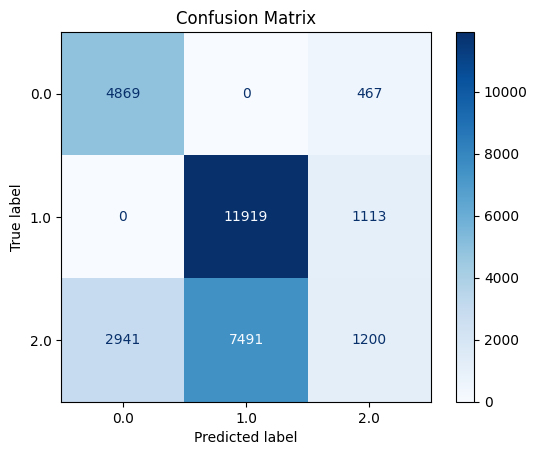

In [18]:

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

# Show the confusion matrix
plt.title("Confusion Matrix");

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.6086
F1 Score: 0.5012
Precision: 0.5524
Recall: 0.6086


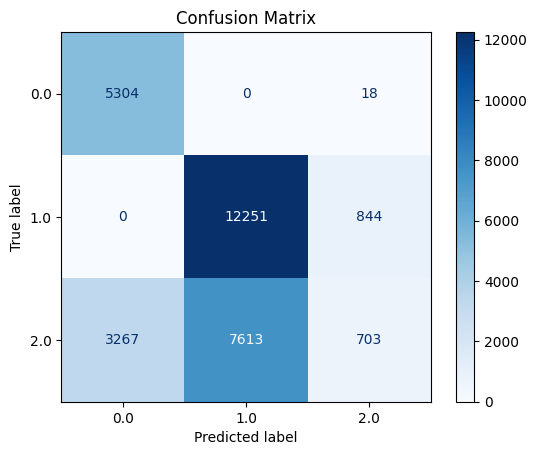

In [20]:
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Data Splitting
X = df.drop(columns='Risk_Level')
y = df['Risk_Level']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

# Convert class weights to a list for LightGBM
class_weights_list = [class_weights_dict[label] for label in y_train]

# Train LightGBM model with class weights
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train, sample_weight=class_weights_list)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print out the scores
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

# Show the confusion matrix
plt.title("Confusion Matrix")
plt.show()


In [23]:
import pickle
# Save the model to a file using pickle
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved to 'lgbm_model.pkl'")

# Load the saved model
with open('lgbm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully")


Model saved to 'lgbm_model.pkl'
Model loaded successfully
